# Visualization for Final Paper

## Alaa et al. synthethic data (Setup A and B)

In [1]:
import glob
import pandas as pd

csv_files_setupA = glob.glob("../../results/outputs/alaa/setupA/eval/*.csv")
csv_files_setupB = glob.glob("../../results/outputs/alaa/setupB/eval/*.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'A'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_A = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'B'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_B = pd.concat(data, axis=0, ignore_index=True)

In [2]:
import numpy as np


df_A["Significance"] = np.round(1 - df_A["alpha"], 2)
df_B["Significance"] = np.round(1 - df_B["alpha"], 2)

df_A_wo_90 = df_A[df_A["Significance"] != 0.9]
df_B_wo_90 = df_B[df_B["Significance"] != 0.9]

df_A_90 = df_A[df_A["Significance"] == 0.9]
df_B_90 = df_B[df_B["Significance"] == 0.9]

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

/tmp/ipykernel_158149/962711421.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[-1, 1].set_xticklabels(axs[-1, 1].get_xticklabels(), rotation=45)
/tmp/ipykernel_158149/962711421.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[-1, 0].set_xticklabels(axs[-1, 0].get_xticklabels(), rotation=45)


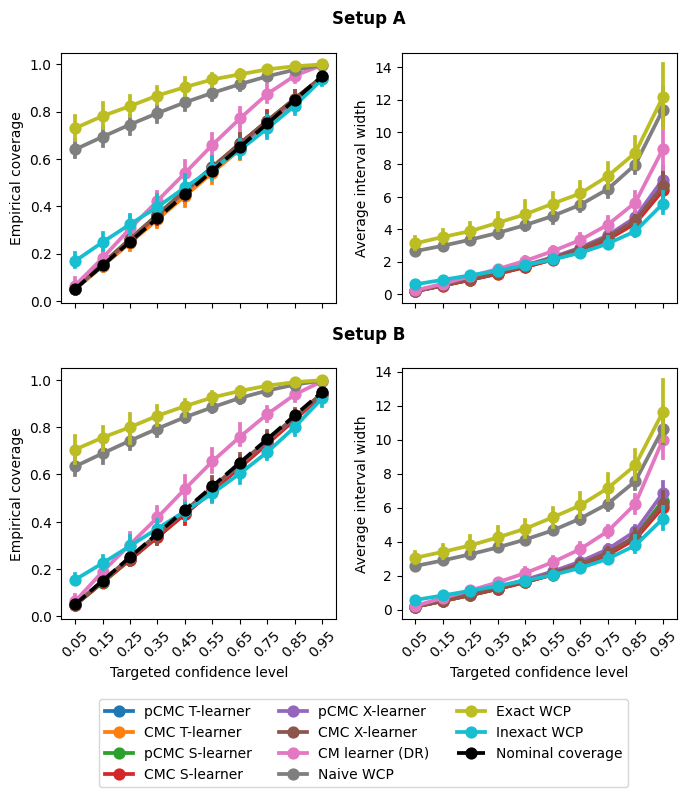

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

for i, df in enumerate([df_A_wo_90, df_B_wo_90]):
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_T_ite"], ax=axs[i, 0], label="pCMC T-learner",
                errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_T_ite"], ax=axs[i, 0], label="CMC T-learner",
                errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_S_ite"], ax=axs[i, 0], label="pCMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_S_ite"], ax=axs[i, 0], label="CMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_X_ite"], ax=axs[i, 0], label="pCMC X-learner", errorbar="pi"
                    )
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_X_ite"], ax=axs[i, 0], label="CMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_CM_ite"], ax=axs[i, 0], label="CM learner (DR)", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_naive_ite"], ax=axs[i, 0], label="Naive WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_exact_ite"], ax=axs[i, 0], label="Exact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_inexact_ite"], ax=axs[i, 0], label="Inexact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["Significance"], ax=axs[i, 0], label="Nominal coverage",
            linestyle='--', color='black')
    axs[i, 0].set_ylabel("Empirical coverage")
    axs[i, 0].set_xlabel("Targeted confidence level")
    axs[i, 0]._remove_legend(axs[i, 0].get_legend_handles_labels()[0][0])

    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_T"], ax=axs[i, 1], label="pCMC T-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_T"], ax=axs[i, 1], label="CMC T-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_S"], ax=axs[i, 1], label="pCMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_S"], ax=axs[i, 1], label="CMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_X"], ax=axs[i, 1], label="pCMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_X"], ax=axs[i, 1], label="CMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_CM"], ax=axs[i, 1], label="CM learner (DR)", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_naive_ite"], ax=axs[i, 1], label="Naive WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_exact_ite"], ax=axs[i, 1], label="Exact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_inexact_ite"], ax=axs[i, 1], label="Inexact WCP", errorbar="pi")
    axs[i, 1].set_ylabel("Average interval width")
    axs[i, 1].set_xlabel("Targeted confidence level")
    axs[i, 1]._remove_legend(axs[i, 1].get_legend_handles_labels()[0][0])

axs[-1, 1].set_xticklabels(axs[-1, 1].get_xticklabels(), rotation=45)
axs[-1, 0].set_xticklabels(axs[-1, 0].get_xticklabels(), rotation=45)
grid = plt.GridSpec(2, 2)
create_subtitle(fig, grid[0, ::], 'Setup A')
create_subtitle(fig, grid[1, ::], 'Setup B')
plt.tight_layout()
axs[1, 0].legend(loc='lower center', ncol=3, bbox_to_anchor=(1.1, -0.70))
plt.savefig("../../results/figures/alaa_coverage_setupA_setupB.pdf", bbox_inches='tight')
plt.show()

In [5]:
# Create a dataframe with the results
import pandas as pd

df_results_90 =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_T_ite"], "Interval length": df_A_90["int_width_pseudo_MC_T"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "A"})
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_T_ite"], "Interval length": df_A_90["int_width_MC_T"],
                                                        "RMSE": df_A_90["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_S_ite"], "Interval length": df_A_90["int_width_pseudo_MC_S"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_S_ite"], "Interval length": df_A_90["int_width_MC_S"],
                                                        "RMSE": df_A_90["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_X_ite"], "Interval length": df_A_90["int_width_pseudo_MC_X"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_X_ite"], "Interval length": df_A_90["int_width_MC_X"],
                                                        "RMSE": df_A_90["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_CM_ite"], "Interval length": df_A_90["int_width_CM"], "RMSE": df_A_90["rmse_CM_ite"],
                                "Method": "CM learner (DR)", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_naive_ite"], "Interval length": df_A_90["int_width_naive_ite"],
                                                        "RMSE": df_A_90["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_exact_ite"], "Interval length": df_A_90["int_width_exact_ite"],
                                                        "RMSE": df_A_90["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_inexact_ite"], "Interval length": df_A_90["int_width_inexact_ite"],
                                                        "RMSE": df_A_90["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "A"})], ignore_index=True)


df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_pseudo_MC_T_ite"], "Interval length": df_B_90["int_width_pseudo_MC_T"],
                                                        "RMSE": df_B_90["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_MC_T_ite"], "Interval length": df_B_90["int_width_MC_T"],
                                                        "RMSE": df_B_90["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_pseudo_MC_S_ite"], "Interval length": df_B_90["int_width_pseudo_MC_S"],
                                                        "RMSE": df_B_90["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_MC_S_ite"], "Interval length": df_B_90["int_width_MC_S"],
                                                        "RMSE": df_B_90["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_pseudo_MC_X_ite"], "Interval length": df_B_90["int_width_pseudo_MC_X"],
                                                        "RMSE": df_B_90["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_MC_X_ite"], "Interval length": df_B_90["int_width_MC_X"],
                                                        "RMSE": df_B_90["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_CM_ite"], "Interval length": df_B_90["int_width_CM"], "RMSE": df_B_90["rmse_CM_ite"],
                                "Method": "CM learner (DR)", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_naive_ite"], "Interval length": df_B_90["int_width_naive_ite"],
                                                        "RMSE": df_B_90["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_exact_ite"], "Interval length": df_B_90["int_width_exact_ite"],
                                                        "RMSE": df_B_90["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "B"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_B_90["coverage_inexact_ite"], "Interval length": df_B_90["int_width_inexact_ite"],
                                                        "RMSE": df_B_90["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "B"})], ignore_index=True)

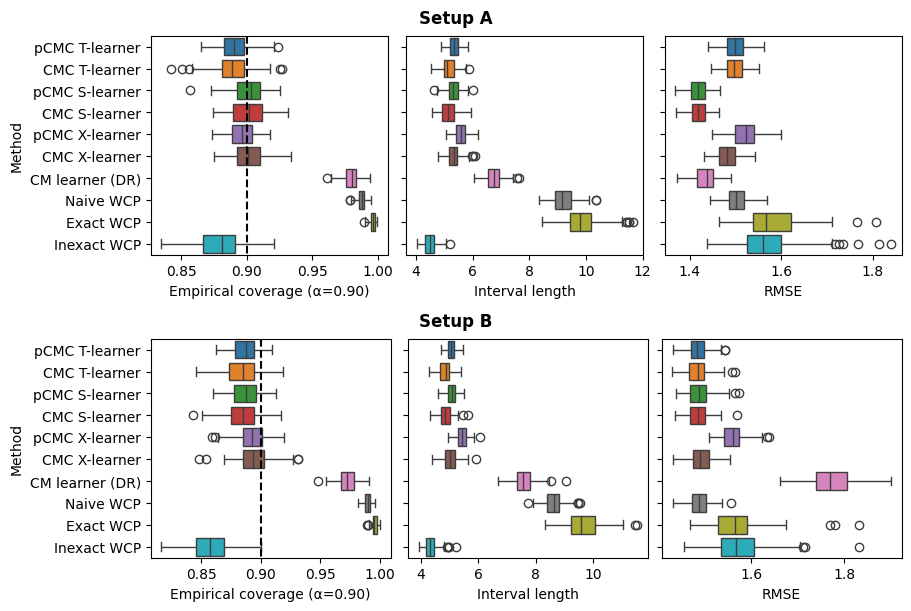

In [6]:
fig = plt.figure(constrained_layout=True, figsize=(9, 6))

subfigs = fig.subfigures(nrows=2, ncols=1)
subfigs[0].suptitle('Setup A', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method")
axsA[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method")

subfigs[1].suptitle('Setup B', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method")
axsB[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method")

fig.savefig("../../results/figures/results_90_synthetic_alaa.pdf", bbox_inches='tight')
plt.show()

## Semi-synthetic data IHDP and NLSM

In [7]:
import glob
import pandas as pd

csv_files_setup_nlsm = glob.glob("../../results/outputs/ihdp/eval/*.csv")
csv_files_setup_ihdp = glob.glob("../../results/outputs/nlsm/eval/*.csv")

data = []

for filepath in csv_files_setup_nlsm:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['Setup'] = 'IHDP'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_IHDP = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setup_ihdp:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['Setup'] = 'NLSM'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_NLSM = pd.concat(data, axis=0, ignore_index=True)

In [8]:
# Create a dataframe with the results
import pandas as pd

df_sim_synth =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_pseudo_MC_T_ite"], "Interval length": df_IHDP["int_width_pseudo_MC_T"],
                                                        "RMSE": df_IHDP["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "IHDP"})
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_MC_T_ite"], "Interval length": df_IHDP["int_width_MC_T"],
                                                        "RMSE": df_IHDP["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_pseudo_MC_S_ite"], "Interval length": df_IHDP["int_width_pseudo_MC_S"],
                                                        "RMSE": df_IHDP["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_MC_S_ite"], "Interval length": df_IHDP["int_width_MC_S"],
                                                        "RMSE": df_IHDP["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_pseudo_MC_X_ite"], "Interval length": df_IHDP["int_width_pseudo_MC_X"],
                                                        "RMSE": df_IHDP["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_MC_X_ite"], "Interval length": df_IHDP["int_width_MC_X"],
                                                        "RMSE": df_IHDP["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_CM_ite"], "Interval length": df_IHDP["int_width_CM"], "RMSE": df_IHDP["rmse_CM_ite"],
                                "Method": "CM learner (DR)", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_naive_ite"], "Interval length": df_IHDP["int_width_naive_ite"],
                                                        "RMSE": df_IHDP["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_exact_ite"], "Interval length": df_IHDP["int_width_exact_ite"],
                                                        "RMSE": df_IHDP["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "IHDP"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_IHDP["coverage_inexact_ite"], "Interval length": df_IHDP["int_width_inexact_ite"],
                                                        "RMSE": df_IHDP["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "IHDP"})], ignore_index=True)


df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_pseudo_MC_T_ite"], "Interval length": df_NLSM["int_width_pseudo_MC_T"],
                                                        "RMSE": df_NLSM["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_MC_T_ite"], "Interval length": df_NLSM["int_width_MC_T"],
                                                        "RMSE": df_NLSM["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_pseudo_MC_S_ite"], "Interval length": df_NLSM["int_width_pseudo_MC_S"],
                                                        "RMSE": df_NLSM["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_MC_S_ite"], "Interval length": df_NLSM["int_width_MC_S"],
                                                        "RMSE": df_NLSM["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_pseudo_MC_X_ite"], "Interval length": df_NLSM["int_width_pseudo_MC_X"],
                                                        "RMSE": df_NLSM["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_MC_X_ite"], "Interval length": df_NLSM["int_width_MC_X"],
                                                        "RMSE": df_NLSM["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_CM_ite"], "Interval length": df_NLSM["int_width_CM"], "RMSE": df_NLSM["rmse_CM_ite"],
                                "Method": "CM learner (DR)", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_naive_ite"], "Interval length": df_NLSM["int_width_naive_ite"],
                                                        "RMSE": df_NLSM["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_exact_ite"], "Interval length": df_NLSM["int_width_exact_ite"],
                                                        "RMSE": df_NLSM["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "NLSM"})], ignore_index=True)
df_sim_synth = pd.concat([df_sim_synth, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_NLSM["coverage_inexact_ite"], "Interval length": df_NLSM["int_width_inexact_ite"],
                                                        "RMSE": df_NLSM["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "NLSM"})], ignore_index=True)

In [9]:
# 50th Percentile
def q5(x):
    return x.quantile(0.05)
# 90th Percentile
def q95(x):
    return x.quantile(0.95)

df_sim_synth[df_sim_synth["Setup"] == "IHDP"].groupby(["Method"]).agg({"Empirical coverage (⍺=0.90)": ["mean", "std"],
                                    "Interval length": ["mean", "std"],
                                    "RMSE": ["mean", "std"]}).round(2)

Empirical coverage (⍺=0.90)       Interval length         \
                                       mean   std            mean    std   
Method                                                                     
CM learner (DR)                        0.97  0.06           17.05  17.19   
CMC S-learner                          0.77  0.16           11.28  12.28   
CMC T-learner                          0.66  0.18           10.08  11.50   
CMC X-learner                          0.70  0.17           11.07  12.34   
Exact WCP                              0.99  0.02           33.86  50.95   
Inexact WCP                            0.60  0.20            7.34   4.96   
Naive WCP                              0.95  0.06           18.40  15.93   
pCMC S-learner                         0.76  0.17           12.14  15.97   
pCMC T-learner                         0.71  0.17           10.83  12.16   
pCMC X-learner                         0.72  0.17           12.45  14.78   

                 RMSE        
                 mean   std  
Method                       
CM learner (DR)  3.52  2.42  
CMC S-learner    4.46  4.17  
CMC T-learner    5.26  5.79  
CMC X-learner    5.39  6.00  
Exact WCP        5.00  5.14  
Inexact WCP      4.77  4.73  
Naive WCP        5.29  5.82  
pCMC S-learner   4.48  4.24  
pCMC T-learner   5.35  5.98  
pCMC X-learner   5.85  6.95

In [10]:
df_sim_synth[df_sim_synth["Setup"] == "NLSM"].groupby(["Method"]).agg({"Empirical coverage (⍺=0.90)": ["mean", "std"],
                                    "Interval length": ["mean", "std"],
                                    "RMSE": ["mean", "std"]}).round(4)

Empirical coverage (⍺=0.90)         Interval length          \
                                       mean     std            mean     std   
Method                                                                        
CM learner (DR)                      1.0000  0.0001          3.5503  0.0786   
CMC S-learner                        0.9992  0.0010          2.6324  0.0482   
CMC T-learner                        0.9991  0.0010          2.6399  0.0474   
CMC X-learner                        0.9992  0.0009          2.6708  0.0464   
Exact WCP                            1.0000  0.0000          4.6955  0.1126   
Inexact WCP                          1.0000  0.0002          2.2050  0.0327   
Naive WCP                            1.0000  0.0000          4.4873  0.0565   
pCMC S-learner                       0.9990  0.0010          2.6372  0.0307   
pCMC T-learner                       0.9991  0.0010          2.6472  0.0348   
pCMC X-learner                       0.9969  0.0016          2.7624  0.0323   

                   RMSE          
                   mean     std  
Method                           
CM learner (DR)  0.1506  0.0118  
CMC S-learner    0.3707  0.0101  
CMC T-learner    0.3850  0.0099  
CMC X-learner    0.3859  0.0103  
Exact WCP        0.3970  0.0222  
Inexact WCP      0.3929  0.0216  
Naive WCP        0.3858  0.0112  
pCMC S-learner   0.3723  0.0105  
pCMC T-learner   0.3852  0.0098  
pCMC X-learner   0.4393  0.0107

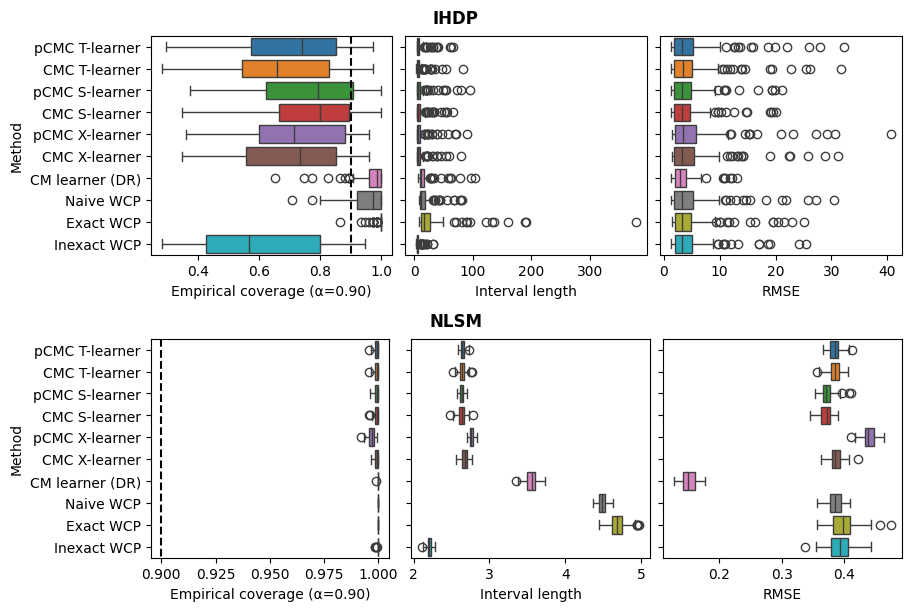

In [11]:
fig = plt.figure(constrained_layout=True, figsize=(9, 6))

subfigs = fig.subfigures(nrows=2, ncols=1)
subfigs[0].suptitle('IHDP', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_sim_synth[df_sim_synth["Setup"]=="IHDP"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method")
axsA[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_sim_synth[df_sim_synth["Setup"]=="IHDP"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method")
sns.boxplot(data=df_sim_synth[df_sim_synth["Setup"]=="IHDP"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method")

subfigs[1].suptitle('NLSM', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_sim_synth[df_sim_synth["Setup"]=="NLSM"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method")
axsB[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_sim_synth[df_sim_synth["Setup"]=="NLSM"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method")
sns.boxplot(data=df_sim_synth[df_sim_synth["Setup"]=="NLSM"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method")

fig.savefig("../../results/figures/results_90_ihdp_nlsm.pdf", bbox_inches='tight')
plt.show()

## Nie and Wager (2021) synthethic data (Setup A, B, C, D)

### RF adaptive

In [12]:
import glob
import pandas as pd

csv_files_setupA = glob.glob("../../results/outputs/r_learner/setupA/eval/*RF_adaptive_eval.csv")
csv_files_setupB = glob.glob("../../results/outputs/r_learner/setupB/eval/*RF_adaptive_eval.csv")
csv_files_setupC = glob.glob("../../results/outputs/r_learner/setupC/eval/*RF_adaptive_eval.csv")
csv_files_setupD = glob.glob("../../results/outputs/r_learner/setupD/eval/*RF_adaptive_eval.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'A'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_A = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'B'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_B = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupC:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'C'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_C = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupD:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'D'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_D = pd.concat(data, axis=0, ignore_index=True)

In [13]:
import numpy as np

df_A["Significance"] = np.round(1 - df_A["alpha"], 2)
df_B["Significance"] = np.round(1 - df_B["alpha"], 2)
df_C["Significance"] = np.round(1 - df_C["alpha"], 2)
df_D["Significance"] = np.round(1 - df_D["alpha"], 2)

df_A_wo_90 = df_A[df_A["Significance"] != 0.9]
df_B_wo_90 = df_B[df_B["Significance"] != 0.9]
df_C_wo_90 = df_C[df_C["Significance"] != 0.9]
df_D_wo_90 = df_D[df_D["Significance"] != 0.9]

df_A_90 = df_A[df_A["Significance"] == 0.9]
df_B_90 = df_B[df_B["Significance"] == 0.9]
df_C_90 = df_C[df_C["Significance"] == 0.9]
df_D_90 = df_D[df_D["Significance"] == 0.9]

In [14]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

/tmp/ipykernel_158149/3408609814.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[-1, 1].set_xticklabels(axs[-1, 1].get_xticklabels(), rotation=45)
/tmp/ipykernel_158149/3408609814.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[-1, 0].set_xticklabels(axs[-1, 0].get_xticklabels(), rotation=45)


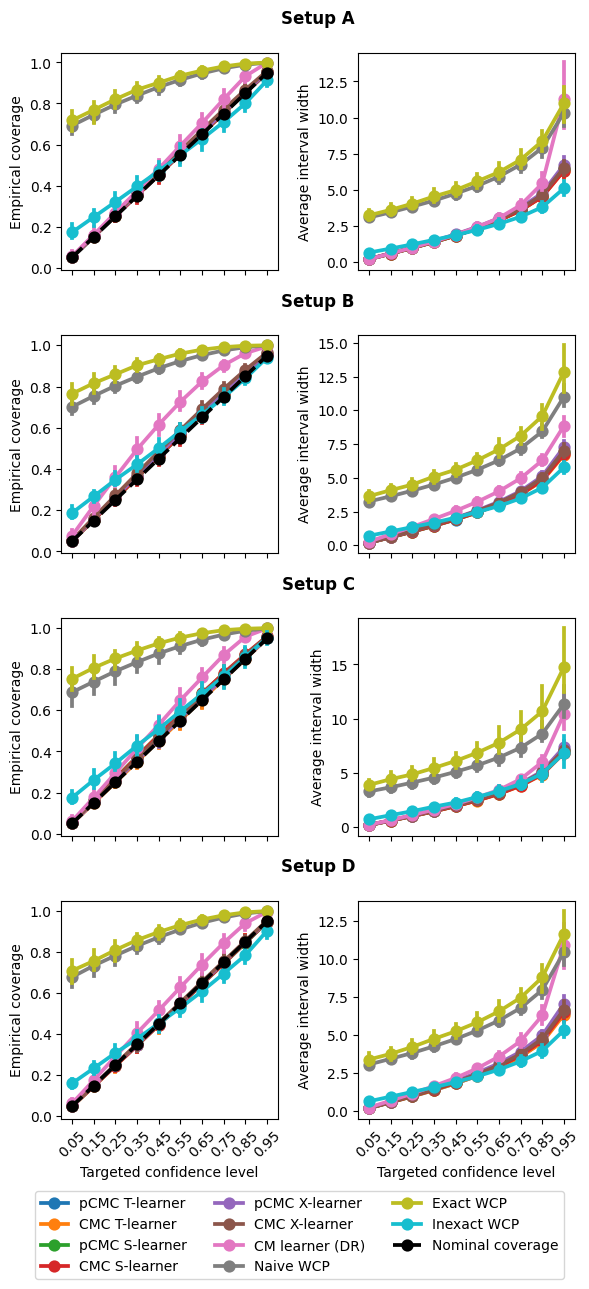

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(6, 12), sharex=True)

for i, df in enumerate([df_A_wo_90, df_B_wo_90, df_C_wo_90, df_D_wo_90]):
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_T_ite"], ax=axs[i, 0], label="pCMC T-learner",
                errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_T_ite"], ax=axs[i, 0], label="CMC T-learner",
                errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_S_ite"], ax=axs[i, 0], label="pCMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_S_ite"], ax=axs[i, 0], label="CMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_X_ite"], ax=axs[i, 0], label="pCMC X-learner", errorbar="pi"
                    )
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_X_ite"], ax=axs[i, 0], label="CMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_CM_ite"], ax=axs[i, 0], label="CM learner (DR)", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_naive_ite"], ax=axs[i, 0], label="Naive WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_exact_ite"], ax=axs[i, 0], label="Exact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_inexact_ite"], ax=axs[i, 0], label="Inexact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["Significance"], ax=axs[i, 0], label="Nominal coverage",
            linestyle='--', color='black')
    axs[i, 0].set_ylabel("Empirical coverage")
    axs[i, 0].set_xlabel("Targeted confidence level")
    axs[i, 0]._remove_legend(axs[i, 0].get_legend_handles_labels()[0][0])

    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_T"], ax=axs[i, 1], label="pCMC T-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_T"], ax=axs[i, 1], label="CMC T-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_S"], ax=axs[i, 1], label="pCMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_S"], ax=axs[i, 1], label="CMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_X"], ax=axs[i, 1], label="pCMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_X"], ax=axs[i, 1], label="CMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_CM"], ax=axs[i, 1], label="CM learner (DR)", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_naive_ite"], ax=axs[i, 1], label="Naive WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_exact_ite"], ax=axs[i, 1], label="Exact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_inexact_ite"], ax=axs[i, 1], label="Inexact WCP", errorbar="pi")
    axs[i, 1].set_ylabel("Average interval width")
    axs[i, 1].set_xlabel("Targeted confidence level")
    axs[i, 1]._remove_legend(axs[i, 1].get_legend_handles_labels()[0][0])

axs[-1, 1].set_xticklabels(axs[-1, 1].get_xticklabels(), rotation=45)
axs[-1, 0].set_xticklabels(axs[-1, 0].get_xticklabels(), rotation=45)
grid = plt.GridSpec(4, 2)
create_subtitle(fig, grid[0, ::], 'Setup A')
create_subtitle(fig, grid[1, ::], 'Setup B')
create_subtitle(fig, grid[2, ::], 'Setup C')
create_subtitle(fig, grid[3, ::], 'Setup D')
plt.tight_layout()
axs[-1, 0].legend(loc='lower center', ncol=3, bbox_to_anchor=(1.1, -0.77))
plt.savefig("../../results/figures/nie_wager_coverage_setupA_B_C_D.pdf", bbox_inches='tight')
plt.show()

In [16]:
# Create a dataframe with the results
import pandas as pd

df_results_90 =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_T_ite"], "Interval length": df_A_90["int_width_pseudo_MC_T"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "A"})
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_T_ite"], "Interval length": df_A_90["int_width_MC_T"],
                                                        "RMSE": df_A_90["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_S_ite"], "Interval length": df_A_90["int_width_pseudo_MC_S"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_S_ite"], "Interval length": df_A_90["int_width_MC_S"],
                                                        "RMSE": df_A_90["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_X_ite"], "Interval length": df_A_90["int_width_pseudo_MC_X"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_X_ite"], "Interval length": df_A_90["int_width_MC_X"],
                                                        "RMSE": df_A_90["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_CM_ite"], "Interval length": df_A_90["int_width_CM"], "RMSE": df_A_90["rmse_CM_ite"],
                                "Method": "CM learner (DR)", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_naive_ite"], "Interval length": df_A_90["int_width_naive_ite"],
                                                        "RMSE": df_A_90["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_exact_ite"], "Interval length": df_A_90["int_width_exact_ite"],
                                                        "RMSE": df_A_90["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_inexact_ite"], "Interval length": df_A_90["int_width_inexact_ite"],
                                                        "RMSE": df_A_90["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "A"})], ignore_index=True)

setup_names = ["B", "C", "D"]
for i, df in enumerate([df_B_90, df_C_90, df_D_90]):
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_T_ite"], "Interval length": df["int_width_pseudo_MC_T"],
                                                            "RMSE": df["rmse_pseudo_MC_T_ite"],
                                                            "Method": "pCMC T-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_T_ite"], "Interval length": df["int_width_MC_T"],
                                                            "RMSE": df["rmse_MC_T_ite"],
                                                            "Method": "CMC T-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_S_ite"], "Interval length": df["int_width_pseudo_MC_S"],
                                                            "RMSE": df["rmse_pseudo_MC_S_ite"],
                                                            "Method": "pCMC S-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_S_ite"], "Interval length": df["int_width_MC_S"],
                                                            "RMSE": df["rmse_MC_S_ite"],
                                                            "Method": "CMC S-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_X_ite"], "Interval length": df["int_width_pseudo_MC_X"],
                                                            "RMSE": df["rmse_pseudo_MC_X_ite"],
                                                            "Method": "pCMC X-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_X_ite"], "Interval length": df["int_width_MC_X"],
                                                            "RMSE": df["rmse_MC_X_ite"],
                                                            "Method": "CMC X-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_CM_ite"], "Interval length": df["int_width_CM"], "RMSE": df["rmse_CM_ite"],
                                    "Method": "CM learner (DR)", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_naive_ite"], "Interval length": df["int_width_naive_ite"],
                                                            "RMSE": df["rmse_naive_ite"],
                                                            "Method": "Naive WCP", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_exact_ite"], "Interval length": df["int_width_exact_ite"],
                                                            "RMSE": df["rmse_exact_ite"],
                                                            "Method": "Exact WCP", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_inexact_ite"], "Interval length": df["int_width_inexact_ite"],
                                                            "RMSE": df["rmse_inexact_ite"],
                                                            "Method": "Inexact WCP", "Setup": setup_names[i]})], ignore_index=True)

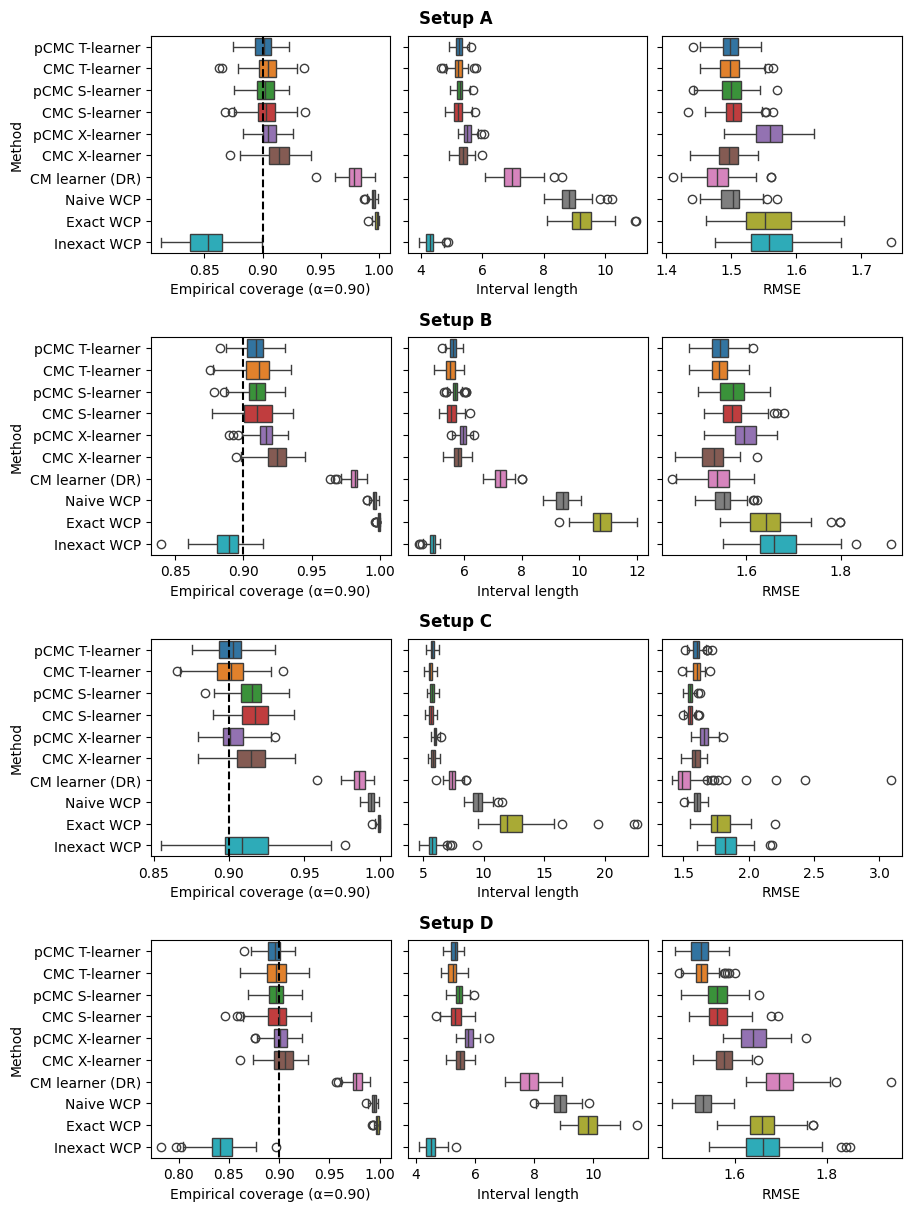

In [17]:
fig = plt.figure(constrained_layout=True, figsize=(9, 12))

subfigs = fig.subfigures(nrows=4, ncols=1)
subfigs[0].suptitle('Setup A', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method")
axsA[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method")

subfigs[1].suptitle('Setup B', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method")
axsB[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method")

subfigs[2].suptitle('Setup C', fontweight='semibold')
axsC = subfigs[2].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsC[0],
            hue="Method")
axsC[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="Interval length", ax=axsC[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="RMSE", ax=axsC[2],
            hue="Method")

subfigs[3].suptitle('Setup D', fontweight='semibold')
axsD = subfigs[3].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsD[0],
            hue="Method")
axsD[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="Interval length", ax=axsD[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="RMSE", ax=axsD[2],
            hue="Method")

fig.savefig("../../results/figures/nie_wager_90_coverage_setupA_B_C_D.pdf", bbox_inches='tight')
plt.show()

### RF adaptive (heteroscedastic epsilons)

In [18]:
import glob
import pandas as pd

csv_files_setupA = glob.glob("../../results/outputs/r_learner/setupA/eval/*RF_adaptive_heteroscedastic_eval.csv")
csv_files_setupB = glob.glob("../../results/outputs/r_learner/setupB/eval/*RF_adaptive_heteroscedastic_eval.csv")
csv_files_setupC = glob.glob("../../results/outputs/r_learner/setupC/eval/*RF_adaptive_heteroscedastic_eval.csv")
csv_files_setupD = glob.glob("../../results/outputs/r_learner/setupD/eval/*RF_adaptive_heteroscedastic_eval.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'A'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_A = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'B'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_B = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupC:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'C'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_C = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupD:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'D'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_D = pd.concat(data, axis=0, ignore_index=True)

In [19]:
import numpy as np

df_A["Significance"] = np.round(1 - df_A["alpha"], 2)
df_B["Significance"] = np.round(1 - df_B["alpha"], 2)
df_C["Significance"] = np.round(1 - df_C["alpha"], 2)
df_D["Significance"] = np.round(1 - df_D["alpha"], 2)

df_A_wo_90 = df_A[df_A["Significance"] != 0.9]
df_B_wo_90 = df_B[df_B["Significance"] != 0.9]
df_C_wo_90 = df_C[df_C["Significance"] != 0.9]
df_D_wo_90 = df_D[df_D["Significance"] != 0.9]

df_A_90 = df_A[df_A["Significance"] == 0.9]
df_B_90 = df_B[df_B["Significance"] == 0.9]
df_C_90 = df_C[df_C["Significance"] == 0.9]
df_D_90 = df_D[df_D["Significance"] == 0.9]

In [20]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

/tmp/ipykernel_158149/1951408066.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[-1, 1].set_xticklabels(axs[-1, 1].get_xticklabels(), rotation=45)
/tmp/ipykernel_158149/1951408066.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[-1, 0].set_xticklabels(axs[-1, 0].get_xticklabels(), rotation=45)


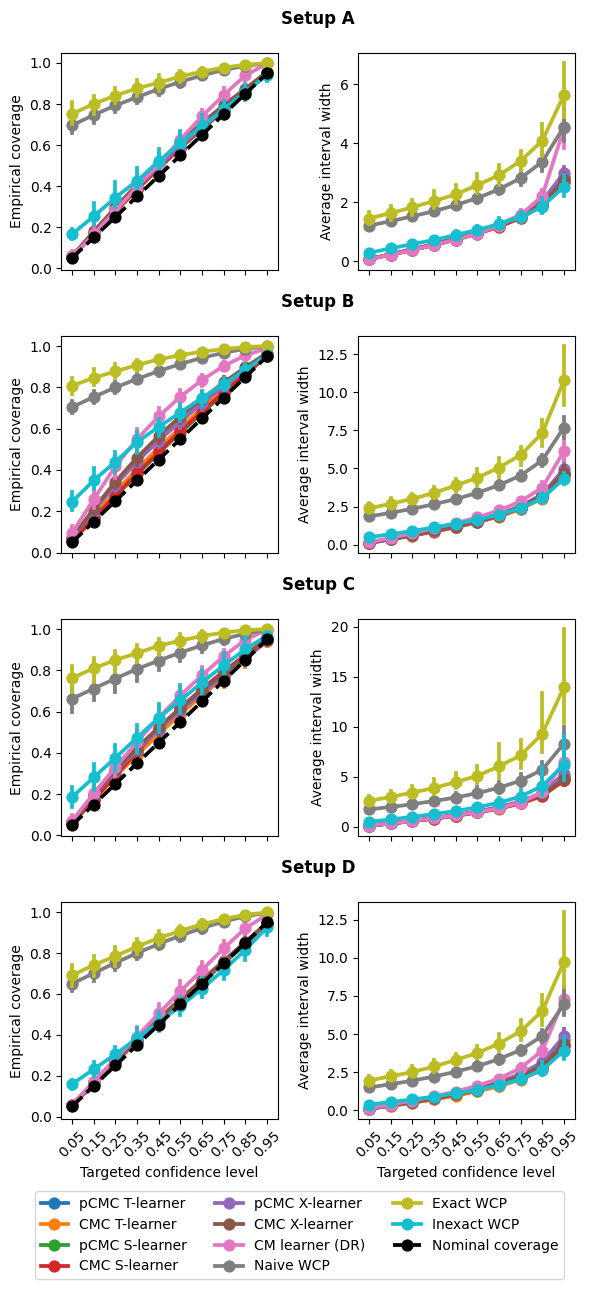

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(4, 2, figsize=(6, 12), sharex=True)

for i, df in enumerate([df_A_wo_90, df_B_wo_90, df_C_wo_90, df_D_wo_90]):
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_T_ite"], ax=axs[i, 0], label="pCMC T-learner",
                errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_T_ite"], ax=axs[i, 0], label="CMC T-learner",
                errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_S_ite"], ax=axs[i, 0], label="pCMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_S_ite"], ax=axs[i, 0], label="CMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_pseudo_MC_X_ite"], ax=axs[i, 0], label="pCMC X-learner", errorbar="pi"
                    )
    sns.pointplot(x=df["Significance"], y=df["coverage_MC_X_ite"], ax=axs[i, 0], label="CMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_CM_ite"], ax=axs[i, 0], label="CM learner (DR)", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_naive_ite"], ax=axs[i, 0], label="Naive WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_exact_ite"], ax=axs[i, 0], label="Exact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["coverage_inexact_ite"], ax=axs[i, 0], label="Inexact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["Significance"], ax=axs[i, 0], label="Nominal coverage",
            linestyle='--', color='black')
    axs[i, 0].set_ylabel("Empirical coverage")
    axs[i, 0].set_xlabel("Targeted confidence level")
    axs[i, 0]._remove_legend(axs[i, 0].get_legend_handles_labels()[0][0])

    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_T"], ax=axs[i, 1], label="pCMC T-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_T"], ax=axs[i, 1], label="CMC T-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_S"], ax=axs[i, 1], label="pCMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_S"], ax=axs[i, 1], label="CMC S-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_pseudo_MC_X"], ax=axs[i, 1], label="pCMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_MC_X"], ax=axs[i, 1], label="CMC X-learner", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_CM"], ax=axs[i, 1], label="CM learner (DR)", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_naive_ite"], ax=axs[i, 1], label="Naive WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_exact_ite"], ax=axs[i, 1], label="Exact WCP", errorbar="pi")
    sns.pointplot(x=df["Significance"], y=df["int_width_inexact_ite"], ax=axs[i, 1], label="Inexact WCP", errorbar="pi")
    axs[i, 1].set_ylabel("Average interval width")
    axs[i, 1].set_xlabel("Targeted confidence level")
    axs[i, 1]._remove_legend(axs[i, 1].get_legend_handles_labels()[0][0])

axs[-1, 1].set_xticklabels(axs[-1, 1].get_xticklabels(), rotation=45)
axs[-1, 0].set_xticklabels(axs[-1, 0].get_xticklabels(), rotation=45)
grid = plt.GridSpec(4, 2)
create_subtitle(fig, grid[0, ::], 'Setup A')
create_subtitle(fig, grid[1, ::], 'Setup B')
create_subtitle(fig, grid[2, ::], 'Setup C')
create_subtitle(fig, grid[3, ::], 'Setup D')
plt.tight_layout()
axs[-1, 0].legend(loc='lower center', ncol=3, bbox_to_anchor=(1.1, -0.77))
plt.savefig("../../results/figures/nie_wager_coverage_setupA_B_C_D_heteroscedastic.pdf", bbox_inches='tight')
plt.show()

In [22]:
# Create a dataframe with the results
import pandas as pd

df_results_90 =  pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_T_ite"], "Interval length": df_A_90["int_width_pseudo_MC_T"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_T_ite"],
                                                        "Method": "pCMC T-learner", "Setup": "A"})
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_T_ite"], "Interval length": df_A_90["int_width_MC_T"],
                                                        "RMSE": df_A_90["rmse_MC_T_ite"],
                                                        "Method": "CMC T-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_S_ite"], "Interval length": df_A_90["int_width_pseudo_MC_S"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_S_ite"],
                                                        "Method": "pCMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_S_ite"], "Interval length": df_A_90["int_width_MC_S"],
                                                        "RMSE": df_A_90["rmse_MC_S_ite"],
                                                        "Method": "CMC S-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_pseudo_MC_X_ite"], "Interval length": df_A_90["int_width_pseudo_MC_X"],
                                                        "RMSE": df_A_90["rmse_pseudo_MC_X_ite"],
                                                        "Method": "pCMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_MC_X_ite"], "Interval length": df_A_90["int_width_MC_X"],
                                                        "RMSE": df_A_90["rmse_MC_X_ite"],
                                                        "Method": "CMC X-learner", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_CM_ite"], "Interval length": df_A_90["int_width_CM"], "RMSE": df_A_90["rmse_CM_ite"],
                                "Method": "CM learner (DR)", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_naive_ite"], "Interval length": df_A_90["int_width_naive_ite"],
                                                        "RMSE": df_A_90["rmse_naive_ite"],
                                                        "Method": "Naive WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_exact_ite"], "Interval length": df_A_90["int_width_exact_ite"],
                                                        "RMSE": df_A_90["rmse_exact_ite"],
                                                        "Method": "Exact WCP", "Setup": "A"})], ignore_index=True)
df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df_A_90["coverage_inexact_ite"], "Interval length": df_A_90["int_width_inexact_ite"],
                                                        "RMSE": df_A_90["rmse_inexact_ite"],
                                                        "Method": "Inexact WCP", "Setup": "A"})], ignore_index=True)

setup_names = ["B", "C", "D"]
for i, df in enumerate([df_B_90, df_C_90, df_D_90]):
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_T_ite"], "Interval length": df["int_width_pseudo_MC_T"],
                                                            "RMSE": df["rmse_pseudo_MC_T_ite"],
                                                            "Method": "pCMC T-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_T_ite"], "Interval length": df["int_width_MC_T"],
                                                            "RMSE": df["rmse_MC_T_ite"],
                                                            "Method": "CMC T-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_S_ite"], "Interval length": df["int_width_pseudo_MC_S"],
                                                            "RMSE": df["rmse_pseudo_MC_S_ite"],
                                                            "Method": "pCMC S-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_S_ite"], "Interval length": df["int_width_MC_S"],
                                                            "RMSE": df["rmse_MC_S_ite"],
                                                            "Method": "CMC S-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_pseudo_MC_X_ite"], "Interval length": df["int_width_pseudo_MC_X"],
                                                            "RMSE": df["rmse_pseudo_MC_X_ite"],
                                                            "Method": "pCMC X-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_MC_X_ite"], "Interval length": df["int_width_MC_X"],
                                                            "RMSE": df["rmse_MC_X_ite"],
                                                            "Method": "CMC X-learner", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_CM_ite"], "Interval length": df["int_width_CM"], "RMSE": df["rmse_CM_ite"],
                                    "Method": "CM learner (DR)", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_naive_ite"], "Interval length": df["int_width_naive_ite"],
                                                            "RMSE": df["rmse_naive_ite"],
                                                            "Method": "Naive WCP", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_exact_ite"], "Interval length": df["int_width_exact_ite"],
                                                            "RMSE": df["rmse_exact_ite"],
                                                            "Method": "Exact WCP", "Setup": setup_names[i]})], ignore_index=True)
    df_results_90 = pd.concat([df_results_90, pd.DataFrame({"Empirical coverage (⍺=0.90)": df["coverage_inexact_ite"], "Interval length": df["int_width_inexact_ite"],
                                                            "RMSE": df["rmse_inexact_ite"],
                                                            "Method": "Inexact WCP", "Setup": setup_names[i]})], ignore_index=True)

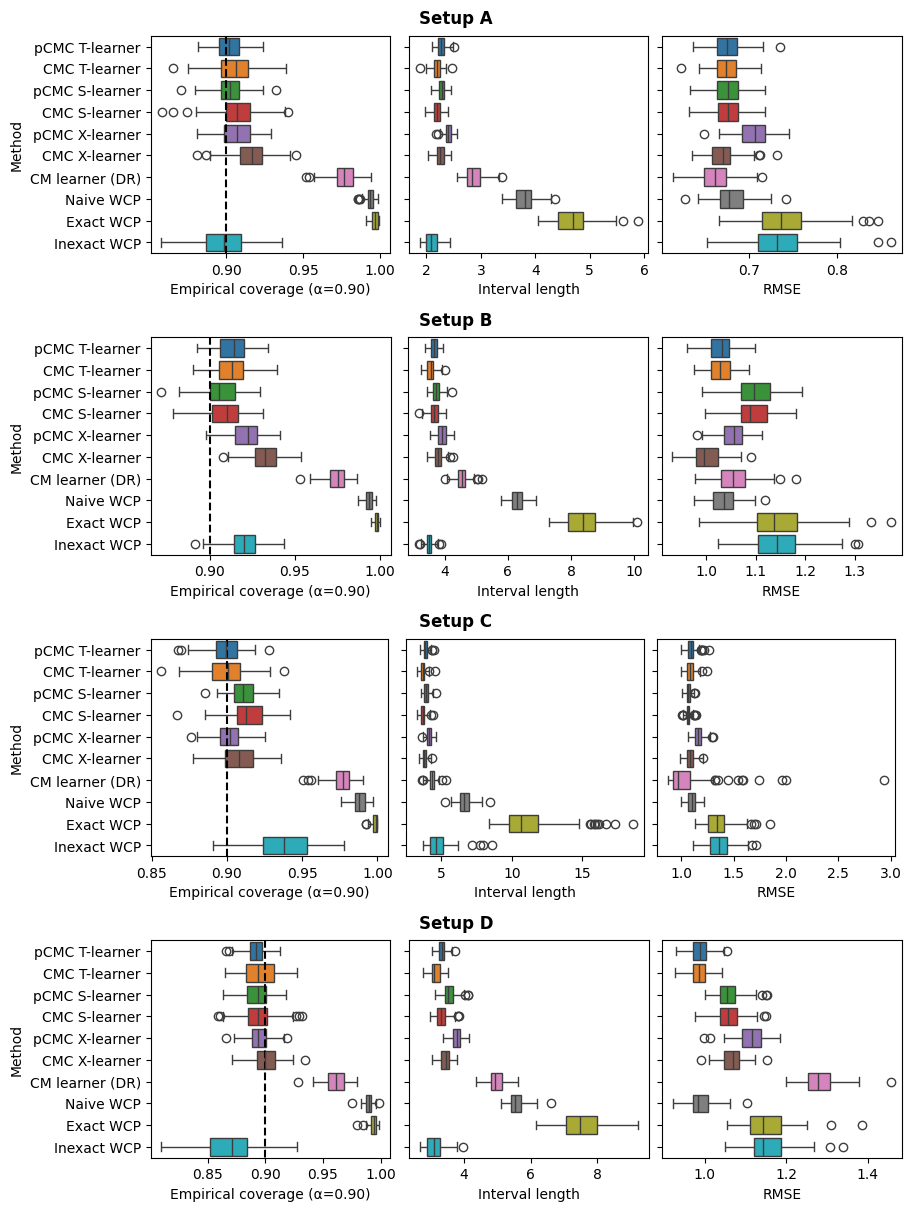

In [23]:
fig = plt.figure(constrained_layout=True, figsize=(9, 12))

subfigs = fig.subfigures(nrows=4, ncols=1)
subfigs[0].suptitle('Setup A', fontweight='semibold')
axsA = subfigs[0].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsA[0],
            hue="Method")
axsA[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="Interval length", ax=axsA[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="A"], y="Method", x="RMSE", ax=axsA[2],
            hue="Method")

subfigs[1].suptitle('Setup B', fontweight='semibold')
axsB = subfigs[1].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsB[0],
            hue="Method")
axsB[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="Interval length", ax=axsB[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="B"], y="Method", x="RMSE", ax=axsB[2],
            hue="Method")

subfigs[2].suptitle('Setup C', fontweight='semibold')
axsC = subfigs[2].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsC[0],
            hue="Method")
axsC[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="Interval length", ax=axsC[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="C"], y="Method", x="RMSE", ax=axsC[2],
            hue="Method")

subfigs[3].suptitle('Setup D', fontweight='semibold')
axsD = subfigs[3].subplots(1, 3, sharey=True)
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="Empirical coverage (⍺=0.90)", ax=axsD[0],
            hue="Method")
axsD[0].vlines(0.90, -0.5, 9.5, linestyle='--', color='black', label='Nominal coverage')
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="Interval length", ax=axsD[1],
            hue="Method")
sns.boxplot(data=df_results_90[df_results_90["Setup"]=="D"], y="Method", x="RMSE", ax=axsD[2],
            hue="Method")

fig.savefig("../../results/figures/nie_wager_90_coverage_setupA_B_C_D_heteroscedastic.pdf", bbox_inches='tight')
plt.show()

### Effect of changing relation in epsilons

In [24]:
import glob
import pandas as pd

csv_files_setupA = glob.glob("../../results/outputs/r_learner/setupA/eval_epsilon/*.csv")
csv_files_setupB = glob.glob("../../results/outputs/r_learner/setupB/eval_epsilon/*.csv")
csv_files_setupC = glob.glob("../../results/outputs/r_learner/setupC/eval_epsilon/*.csv")
csv_files_setupD = glob.glob("../../results/outputs/r_learner/setupD/eval_epsilon/*.csv")

data = []

for filepath in csv_files_setupA:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'A'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_A = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupB:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'B'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_B = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupC:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'C'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_C = pd.concat(data, axis=0, ignore_index=True)

data = []

for filepath in csv_files_setupD:
    df1 = pd.read_csv(filepath, index_col=0, header=0)
    df1['setup'] = 'D'
    df1["sim_nb"] = filepath.split('/')[-1].split('_')[2]
    data.append(df1)

df_D = pd.concat(data, axis=0, ignore_index=True)

In [25]:
df_A["epsilons"]

0      0.0
1      0.1
2      0.2
3      0.3
4      0.4
      ... 
215    0.6
216    0.7
217    0.8
218    0.9
219    1.0
Name: epsilons, Length: 220, dtype: float64

In [26]:
sns.color_palette("tab10")[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

/tmp/ipykernel_158149/62997449.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
/tmp/ipykernel_158149/62997449.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45)


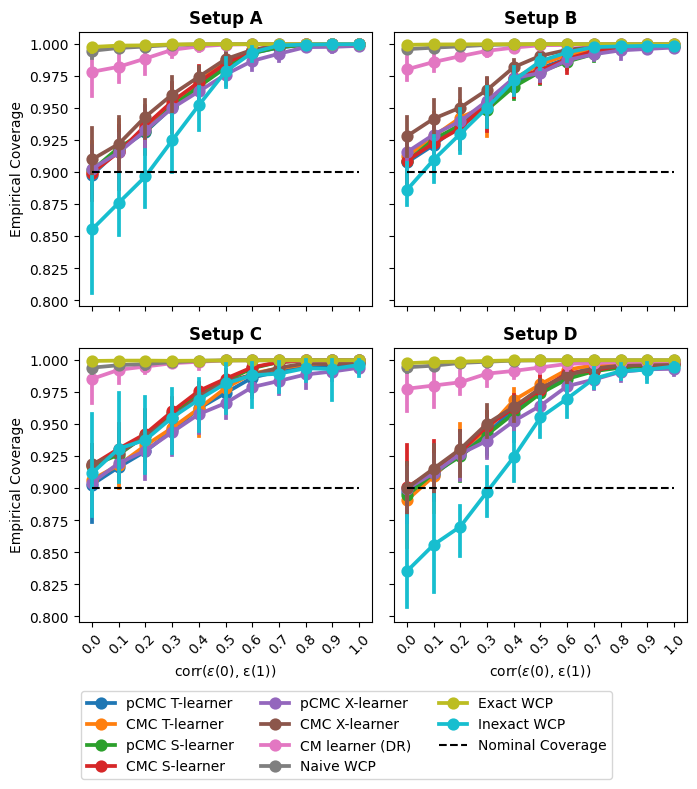

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=True)

setup_names = ["A", "B", "C", "D"]
for i, df in enumerate([df_A, df_B, df_C, df_D]):
    setup_name = setup_names[i]
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_pseudo_MC_T_ite"], ax=axs[i // 2, i % 2,], label="pCMC T-learner", errorbar="pi",
                  legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_MC_T_ite"], ax=axs[i // 2, i % 2,], label="CMC T-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_pseudo_MC_S_ite"], ax=axs[i // 2, i % 2,], label="pCMC S-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_MC_S_ite"], ax=axs[i // 2, i % 2,], label="CMC S-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_pseudo_MC_X_ite"], ax=axs[i // 2, i % 2,], label="pCMC X-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_MC_X_ite"], ax=axs[i // 2, i % 2,], label="CMC X-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_CM_ite"], ax=axs[i // 2, i % 2,], label="CM learner (DR)", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_naive_ite"], ax=axs[i // 2, i % 2,], label="Naive WCP", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_exact_ite"], ax=axs[i // 2, i % 2,], label="Exact WCP", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["coverage_inexact_ite"], ax=axs[i // 2, i % 2,], label="Inexact WCP", errorbar="pi",
                    legend=False)
    axs[i // 2, i % 2,].hlines(0.9, 0, 10, linestyle='--', color='black', label="Nominal Coverage")


    axs[i // 2, i % 2,].set_ylabel("Empirical Coverage")
    axs[i // 2, i % 2,].set_xlabel("corr($ε$(0), ε(1))")

    axs[i // 2, i % 2,].set_title(f"Setup {setup_name}", fontweight='semibold')

axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(-0.16, -0.6))
fig.savefig("../../results/figures/nie_wager_coverage_epsilon.pdf", bbox_inches='tight')
plt.show()

/tmp/ipykernel_158149/3895362173.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
/tmp/ipykernel_158149/3895362173.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45)


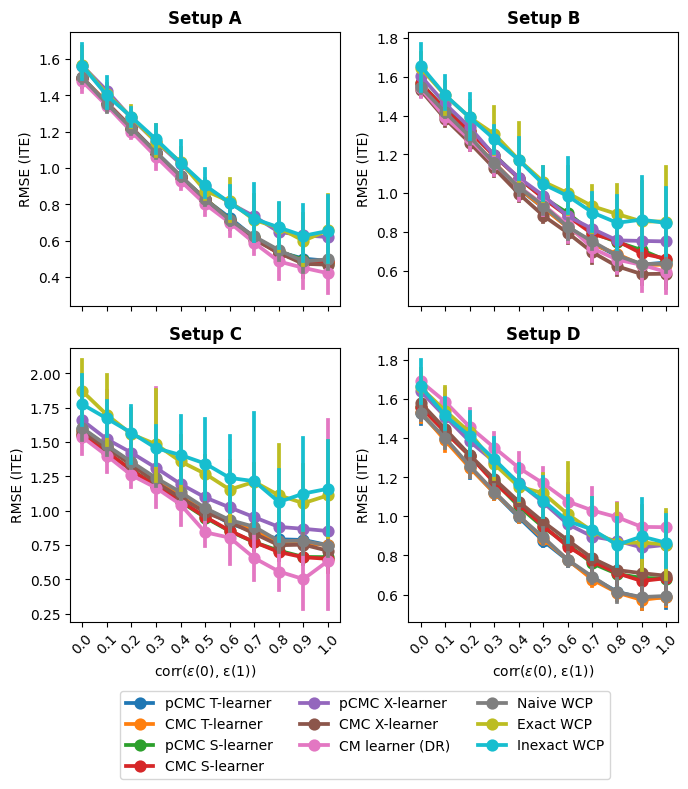

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=True, sharey=False)

setup_names = ["A", "B", "C", "D"]
for i, df in enumerate([df_A, df_B, df_C, df_D]):
    setup_name = setup_names[i]
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_pseudo_MC_T_ite"], ax=axs[i // 2, i % 2,], label="pCMC T-learner", errorbar="pi",
                  legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_MC_T_ite"], ax=axs[i // 2, i % 2,], label="CMC T-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_pseudo_MC_S_ite"], ax=axs[i // 2, i % 2,], label="pCMC S-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_MC_S_ite"], ax=axs[i // 2, i % 2,], label="CMC S-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_pseudo_MC_X_ite"], ax=axs[i // 2, i % 2,], label="pCMC X-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_MC_X_ite"], ax=axs[i // 2, i % 2,], label="CMC X-learner", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_CM_ite"], ax=axs[i // 2, i % 2,], label="CM learner (DR)", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_naive_ite"], ax=axs[i // 2, i % 2,], label="Naive WCP", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_exact_ite"], ax=axs[i // 2, i % 2,], label="Exact WCP", errorbar="pi",
                    legend=False)
    sns.pointplot(x=df["epsilons"].round(2), y=df["rmse_inexact_ite"], ax=axs[i // 2, i % 2,], label="Inexact WCP", errorbar="pi",
                    legend=False)

    axs[i // 2, i % 2].set_ylabel("RMSE (ITE)")
    axs[i // 2, i % 2].set_xlabel("corr($ε$(0), ε(1))")

    axs[i // 2, i % 2].set_title(f"Setup {setup_name}", fontweight='semibold')


axs[1, 0].set_xticklabels(axs[1, 0].get_xticklabels(), rotation=45)
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=45)
plt.tight_layout()

plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(-0.16, -0.6))
fig.savefig("../../results/figures/nie_wager_rmse_epsilon.pdf", bbox_inches='tight')
plt.show()